# Employee Attrition Control


## Import all libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Import the datasets into variables

In [2]:
# The variable left_employees is for employees that have left the company.
left_employees = pd.read_excel('TakenMind-Python-Analytics-Problem-case-study-1-1.xlsx', sheet_name='Employees who have left')

# The variable existing_employees is for existing employees.
existing_employees = pd.read_excel('TakenMind-Python-Analytics-Problem-case-study-1-1.xlsx', sheet_name='Existing employees')

In [3]:
left_employees.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,2,0.80,0.86,5,262,6,0,0,sales,medium
2,3,0.11,0.88,7,272,4,0,0,sales,medium
3,4,0.72,0.87,5,223,5,0,0,sales,low
4,5,0.37,0.52,2,159,3,0,0,sales,low


In [4]:
existing_employees.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,2001,0.58,0.74,4,215,3,0,0,sales,low
1,2002,0.82,0.67,2,202,3,0,0,sales,low
2,2003,0.45,0.69,5,193,3,0,0,sales,low
3,2004,0.78,0.82,5,247,3,0,0,sales,low
4,2005,0.49,0.60,3,214,2,0,0,sales,low


In [3]:
left_employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3571 entries, 0 to 3570
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Emp ID                 3571 non-null   int64  
 1   satisfaction_level     3571 non-null   float64
 2   last_evaluation        3571 non-null   float64
 3   number_project         3571 non-null   int64  
 4   average_montly_hours   3571 non-null   int64  
 5   time_spend_company     3571 non-null   int64  
 6   Work_accident          3571 non-null   int64  
 7   promotion_last_5years  3571 non-null   int64  
 8   dept                   3571 non-null   object 
 9   salary                 3571 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 279.1+ KB


In [4]:
left_employees.describe()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
count,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000
mean,6500.439653,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321
std,6266.484705,0.263933,0.197673,1.818165,61.202825,0.977698,0.212364,0.072759
min,1.000000,0.090000,0.450000,2.000000,126.000000,2.000000,0.000000,0.000000
25%,893.500000,0.130000,0.520000,2.000000,146.000000,3.000000,0.000000,0.000000
50%,1786.000000,0.410000,0.790000,4.000000,224.000000,4.000000,0.000000,0.000000
75%,12678.500000,0.730000,0.900000,6.000000,262.000000,5.000000,0.000000,0.000000
max,14999.000000,0.920000,1.000000,7.000000,310.000000,6.000000,1.000000,1.000000


In [5]:
existing_employees.describe()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
count,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000
mean,7812.340742,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
std,3453.947461,0.217104,0.162005,0.979884,45.682731,1.562348,0.379991,0.159889
min,2001.000000,0.120000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,4857.750000,0.540000,0.580000,3.000000,162.000000,2.000000,0.000000,0.000000
50%,7714.500000,0.690000,0.710000,4.000000,198.000000,3.000000,0.000000,0.000000
75%,10571.250000,0.840000,0.850000,4.000000,238.000000,4.000000,0.000000,0.000000
max,14211.000000,1.000000,1.000000,6.000000,287.000000,10.000000,1.000000,1.000000


## Data Preparation

### Check for null values

In [5]:
left_employees.isnull().any()

Emp ID                   False
satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
promotion_last_5years    False
dept                     False
salary                   False
dtype: bool

In [6]:
existing_employees.isnull().any()

Emp ID                   False
satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
promotion_last_5years    False
dept                     False
salary                   False
dtype: bool

As we can see there are no null values in any of the datasets

### Create a new column in both datasets called 'left' that will show whether an employee has left or not

In [58]:
left_employees['left'] = 1

In [59]:
existing_employees['left'] = 0

### Create a new dataset that contains both existing employees and employees that have left

In [60]:
employees = pd.concat([left_employees, existing_employees],axis=0)

In [61]:
employees.shape

(14999, 11)

## Exploratory Data Analysis

### satisfaction_level

The average satisfaction of employees that have left is 0.44
The average satisfaction of existing employees is 0.67


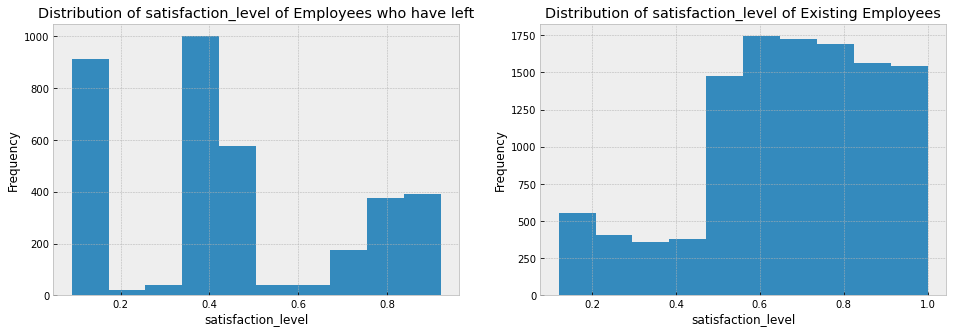

In [82]:
plt.figure(figsize=(16,5))
plt.style.use('bmh')

plt.subplot(1,2,1)
plt.hist(left_employees['satisfaction_level'])
plt.title('Distribution of satisfaction_level of Employees who have left')
plt.xlabel('satisfaction_level')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
plt.hist(existing_employees['satisfaction_level'])
plt.title('Distribution of satisfaction_level of Existing Employees')
plt.xlabel('satisfaction_level')
plt.ylabel('Frequency')

Looking at the plot above you can see that for employees that left, most of them had lower satisfaction levels. The distribution for existing employees shows more people in the with higher satisifaction_levels. 
The bar chart below will give a better look.

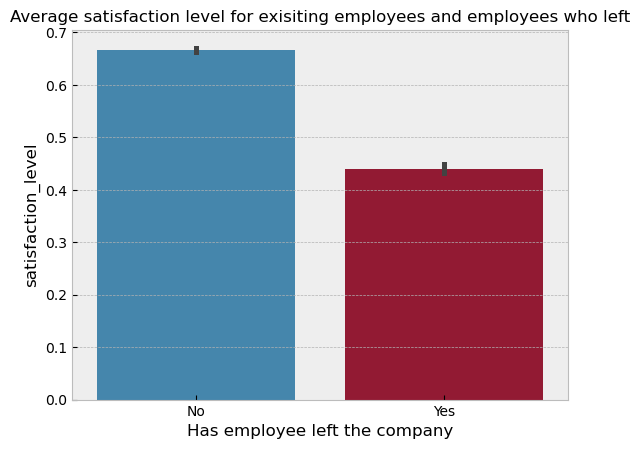

In [96]:
ax = sns.barplot(y='satisfaction_level', x='left', data=employees)
plt.title('Average satisfaction level for exisiting employees and employees who left', fontsize=12)
plt.xlabel('Has employee left the company')
ax.set_xticklabels(['No', 'Yes'])

plt.savefig('averagesatisfaction.png', dpi=600, bbox_inches='tight')

From the barchart above you can see that existing employess have on average a satisfaction_level of about 0.67 while employees that have left have an average satisfaction_level of about 0.44. This shows that employees that left have on average a lower satisfaction_level than existing employees.

This means that satisfaction_level most likely is a factor of employee attrition.

###  time_spend_company

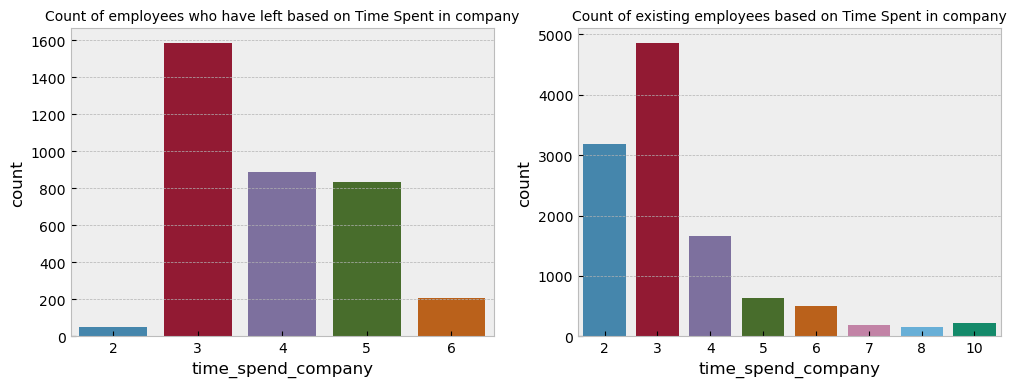

In [74]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.title('Count of employees who have left based on Time Spent in company', fontsize=10)
sns.countplot(x='time_spend_company',data=left_employees)

plt.subplot(1,2,2)
plt.title('Count of existing employees based on Time Spent in company', fontsize=10)
sns.countplot(x='time_spend_company',data=existing_employees)

From the above graph you can see that no employee that spent 7 years or more left the company. That seems to be an indicator that employees who have been in the company longer are less likly to leave.

Let us look at proportions with the stacked barchart below.

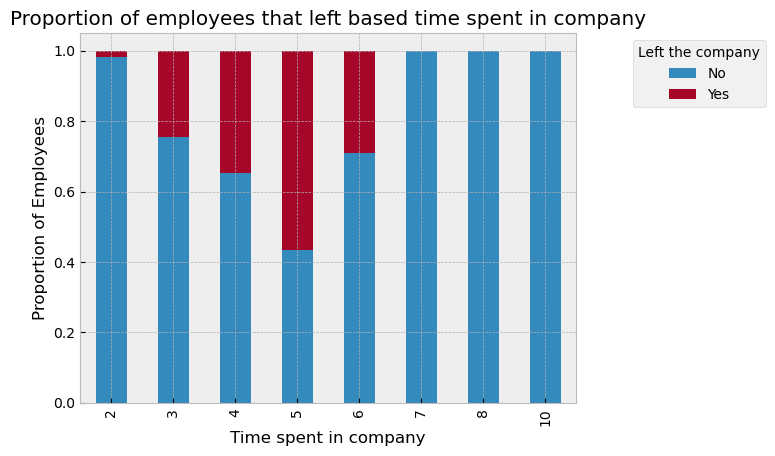

In [97]:
table=pd.crosstab(employees.time_spend_company, employees.left)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Proportion of employees that left based time spent in company')
plt.xlabel('Time spent in company')
plt.ylabel('Proportion of Employees')

l = plt.legend(loc=0, title='Left the company', bbox_to_anchor=(1.1, 1))
l.get_texts()[0].set_text('No')
l.get_texts()[1].set_text('Yes')

plt.savefig('proportion_that_left_by_timespent.png', dpi=600, bbox_inches='tight')

From this stacked bar chart you can see that people that have spent 5 years in the company have the higest proportion of people leaving the company. Also in general people that have spent 3,4,5 and 6 years have the highest proportions of leaving. 

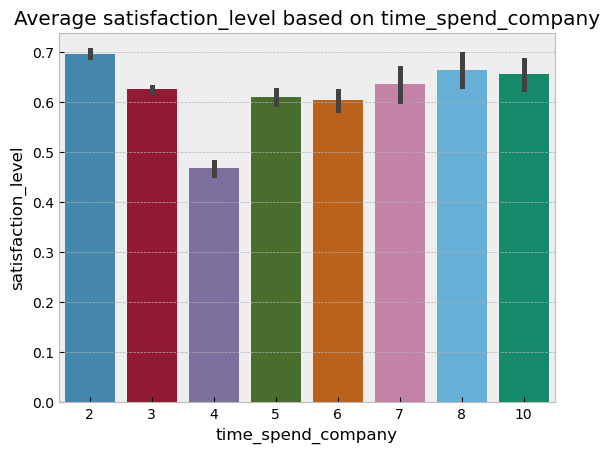

In [98]:
sns.barplot(x='time_spend_company',y='satisfaction_level',data=employees)
plt.title('Average satisfaction_level based on time_spend_company')

plt.savefig('averagesatisfaction_by_timespentcompany.png', dpi=600, bbox_inches='tight')

From this graph we can see that employees who have spent 4 years have the lowest average satisfaction_levels of everyone in the company.

## promotion_last_5years

[Text(0, 0, 'No'), Text(0, 0, 'Yes')]

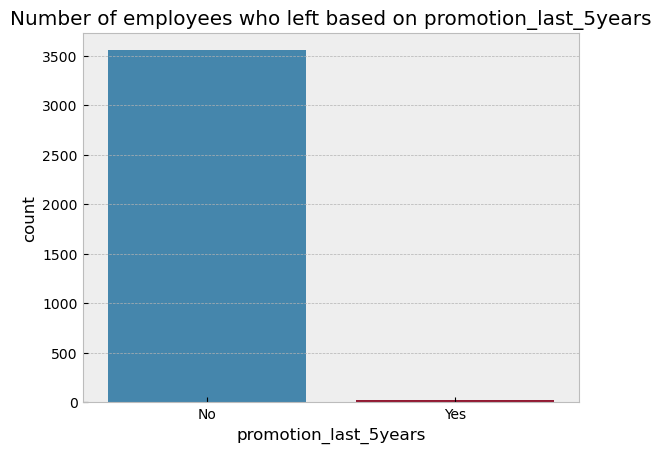

In [81]:
ax = sns.countplot(x='promotion_last_5years',data=left_employees)
plt.title('Number of employees who left based on promotion_last_5years')

ax.set_xticklabels(['No', 'Yes'])

The above graph shows how many employees were promoted in the last 5 years and how many were not for employees who have left. You can see from this that a vast majority of the employees about 99.5% that left were not promoted within the last 5 years.

[Text(0, 0, 'No'), Text(0, 0, 'Yes')]

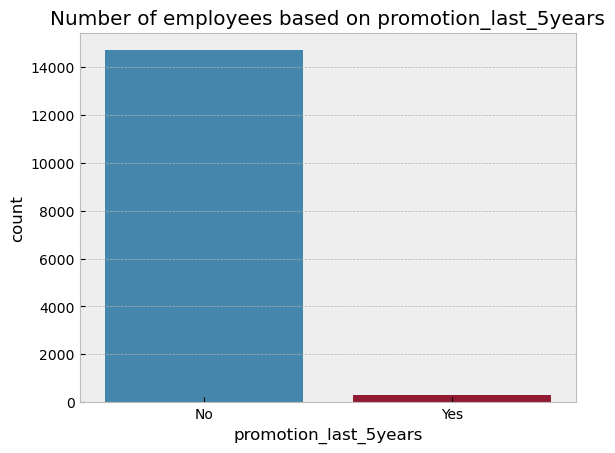

In [83]:
ax = sns.countplot(x='promotion_last_5years',data=employees)
plt.title('Number of employees based on promotion_last_5years')

ax.set_xticklabels(['No', 'Yes'])

This plot shows promotion in last 5 years for all employees. From this you can see that their is hardly any promotion within the company for all employees. About 97.9% of employees have not been promoted within the last 5 years.

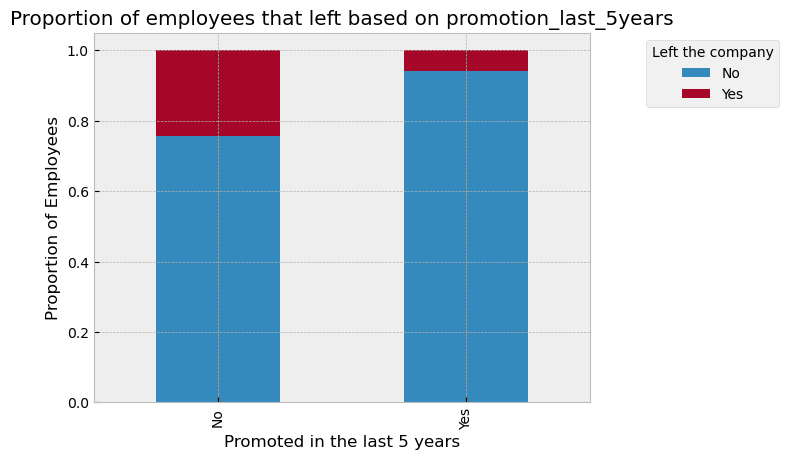

In [99]:
table=pd.crosstab(employees.promotion_last_5years, employees.left)
ax =  table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Proportion of employees that left based on promotion_last_5years')
plt.xlabel('Promoted in the last 5 years')
plt.ylabel('Proportion of Employees')

l = plt.legend(loc=0, title='Left the company', bbox_to_anchor=(1.1, 1))
l.get_texts()[0].set_text('No')
l.get_texts()[1].set_text('Yes')

ax.set_xticklabels(['No', 'Yes'])

plt.savefig('proportion_left_by_promotion_last_5years.png', dpi=600, bbox_inches='tight')

For the above graph you can see the proportion of employees who left depending on if they were promoted or not. For employees that were not promoted you can see that about 24.2% of them left, while for employees who were promoted you can see that just about 6% left. This shows that promotion_last_5years is a factor in  deciding which employees are more likely to leave.

### average_montly_hours

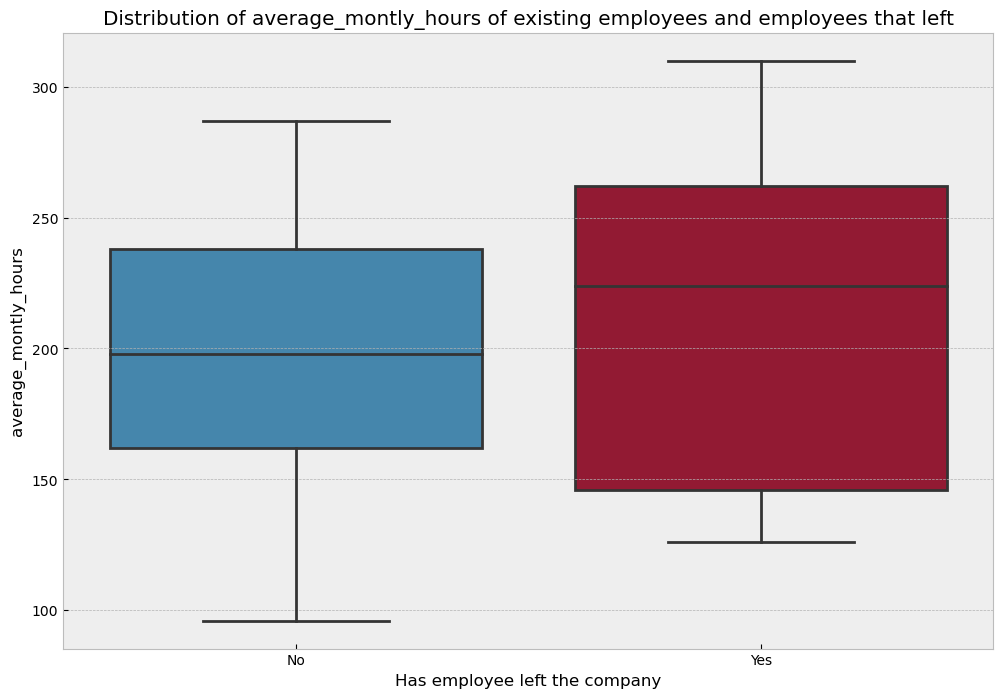

In [100]:
plt.figure(figsize=(12,8))

plt.title('Distribution of average_montly_hours of existing employees and employees that left')
ax = sns.boxplot(y = 'average_montly_hours',data=employees, x='left')
plt.xlabel('Has employee left the company')
ax.set_xticklabels(['No', 'Yes'])

plt.savefig('average_monthly_hours.png', dpi=600, bbox_inches='tight')

From the boxplot above you can see that the employees who left seemed to work more hours than existing employees. The average for employees that left is about 207 hours while for existing employees is about 199 hours. This larger amount of hours could be a factor why employees are leaving.

### salary

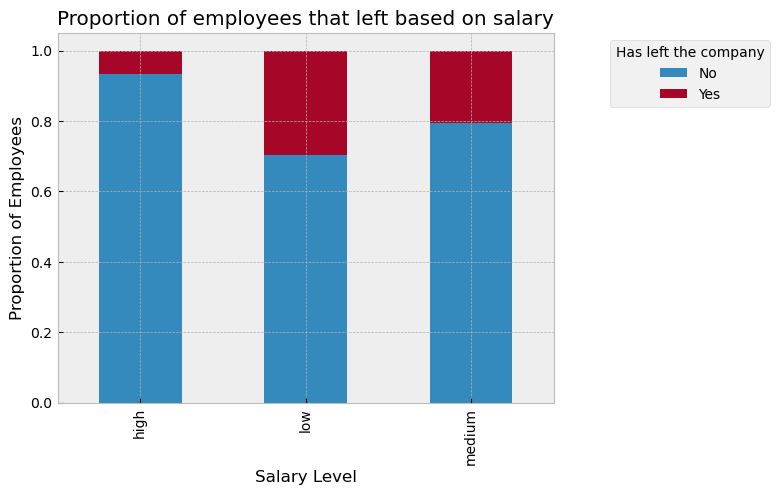

In [101]:
table=pd.crosstab(employees.salary, employees.left)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Proportion of employees that left based on salary')
plt.xlabel('Salary Level')
plt.ylabel('Proportion of Employees')

l = plt.legend(loc=0, title='Has left the company', bbox_to_anchor=(1.1, 1))
l.get_texts()[0].set_text('No')
l.get_texts()[1].set_text('Yes')

plt.savefig('proportion_left_based_on_salary.png', dpi=600, bbox_inches='tight')

From this bar graph you can see that employees with low salaries have the highest proportion of people that leave. This means that people with low salaries have the highest chance of leaving.

### dept

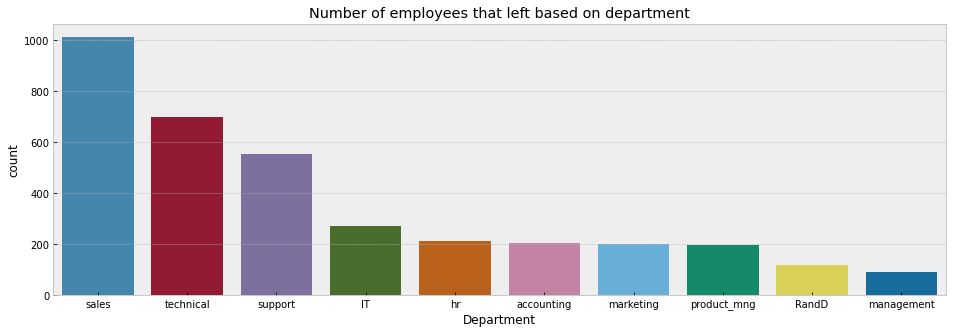

In [87]:
plt.figure(figsize=(16,5))
sns.countplot(x='dept',data=left_employees, order=left_employees['dept'].value_counts().index)
plt.title('Number of employees that left based on department')
plt.xlabel('Department')

plt.savefig('department.png', dpi=600, bbox_inches='tight')

This chart shows the number of employees that left based on their department. We can see that employees from sales, technical and support had the highest number of employees that left. From this we can conclude that the department is also one of the factors of employee attrition. 

# Which employees are prone to leave next ?

#### From the insights gathered from the charts we can make conclusions about which kind of employees are prone to leave next:

Employees having a satisfaction level below the average of 44% 

Employees that a have spent a duration of 3,4,5 and 6 years.

Employees that have not been promoted within the last 5 years.

Employees with higher average_monthly_hours are prone to leave.

Employees with low salary

Now I am going to build a machine learning model that should be able to predict which employees are going to leave based on the features.

## Machine Learning Model

### Logistic Regression Model

I will first start with a logistic regression model. I will create dummy variables for dept and salary columns since they are objects.

In [9]:
employees['dept'] = employees['dept'].astype('category')
employees['salary'] = employees['salary'].astype('category')

employees['salary'] = employees['salary'].cat.codes
employees['dept'] = employees['dept'].cat.codes

In [10]:
employees.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,left
0,1,0.38,0.53,2,157,3,0,0,7,1,1
1,2,0.80,0.86,5,262,6,0,0,7,2,1
2,3,0.11,0.88,7,272,4,0,0,7,2,1
3,4,0.72,0.87,5,223,5,0,0,7,1,1
4,5,0.37,0.52,2,159,3,0,0,7,1,1


### Train Test Split

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(employees.drop(['Emp ID', 'left'], axis=1), employees['left'], test_size=0.30 , random_state=101)

### Train and Predict

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
logmodel = LogisticRegression()

In [15]:
logmodel.fit(X_train, y_train)

C:\Users\MONIORH DANAGOGO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
log_preds = logmodel.predict(X_test)

In [53]:
logmodel.coef_

array([[-4.18112564e+00,  6.71965371e-01, -3.13362772e-01,
         3.67271476e-03,  2.24334702e-01, -1.36930802e+00,
        -9.72184564e-01,  3.94569487e-02,  2.06553233e-02]])

In [54]:
 X_train.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'dept', 'salary'],
      dtype='object')

### Evaluations

In [17]:
from sklearn.metrics import classification_report, confusion_matrix

In [18]:
print(classification_report(y_test, log_preds))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86      3442
           1       0.52      0.26      0.34      1058

    accuracy                           0.77      4500
   macro avg       0.66      0.59      0.60      4500
weighted avg       0.74      0.77      0.74      4500



From the classification_report above we can see that the model has an accuracy of about 77% which is a good score. Let us try a random forest to see if we can get a better accuracy.

### Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
rfc = RandomForestClassifier(n_estimators=100)

In [21]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [22]:
rfc_pred = rfc.predict(X_test)

In [23]:
print(confusion_matrix(y_test, rfc_pred))

[[3434    8]
 [  30 1028]]


In [24]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3442
           1       0.99      0.97      0.98      1058

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.99      4500
weighted avg       0.99      0.99      0.99      4500



From the random forest we got an accuracy of 99% which is extremely high and I think will be a sufficient model for this project.

## Recommendations

In the dataset it is seen that employees with lower satisfaction levels tend to leave. The company should identify and compensate employees in diverse ways such as with a promotion or an increase in salary so as to increase their satisfaction level and loyalty to the company. 

These benefits should especially be targeted at employees that have spent 3,4,5 and 6 years in the company as employees in this range tend to have a higher proportion of themselves leaving the company and also the lowest satisfaction levels.

The company could look at reducing the hours of some workers. This is because on average the employees that left had higher average monthly hours.